In [4]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

In [5]:
numeric_columns=['Shares (Basic)',
       'Shares (Diluted)', 'Cash, Cash Equivalents & Short Term Investments',
       'Accounts & Notes Receivable', 'Inventories', 'Total Current Assets',
       'Property, Plant & Equipment, Net',
       'Long Term Investments & Receivables', 'Other Long Term Assets',
       'Total Noncurrent Assets', 'Total Assets', 'Payables & Accruals',
       'Short Term Debt', 'Total Current Liabilities', 'Long Term Debt',
       'Total Noncurrent Liabilities', 'Total Liabilities',
       'Share Capital & Additional Paid-In Capital', 'Treasury Stock',
       'Retained Earnings', 'Total Equity', 'Total Liabilities & Equity',
       'Price_Present']

In [6]:
clean_fundamen=pd.read_csv("dataset_1.csv")
LabnF=pd.read_csv("./labnf.csv")
X,Y=clean_fundamen[numeric_columns],LabnF["Label"]
scaler = StandardScaler()
scaler.fit(X)
X=scaler.transform(X)

In [7]:
seed = 7
test_size = 0.20
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)

In [8]:
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.metrics import mean_squared_error as mse

In [9]:
reg = KNN(n_neighbors = 10)

# Fitting the model
reg.fit(X_train, y_train)

# Predicting over the Train Set and calculating MSE
test_predict = reg.predict(X_test)
k = mse(test_predict, y_test)
print('Test MSE    ', k )

Test MSE     0.959374468808431


In [11]:
reg.score(X_test,y_test),reg.score(X_train,y_train)

(0.46974332823389425, 0.5751136798266117)

In [17]:
from tqdm import tqdm
def Elbow(K):
  #initiating empty list
    test_mse = []
    test_accuracy=[]
  #training model for evey value of K
    for i in tqdm(K):
        #Instance of KNN
        reg = KNN(n_neighbors = i)
        reg.fit(X_train, y_train)
        #Appending mse value to empty list claculated using the predictions
        tmp = reg.predict(X_test)
        tmp = mse(tmp,y_test)
        test_mse.append(tmp)
        test_accuracy.append(reg.score(X_test,y_test))
    
    return test_mse,test_accuracy

In [18]:
# Defining range of K
k = range(1,20)

In [19]:
mse,acc = Elbow(k)

100%|██████████| 19/19 [03:03<00:00,  9.63s/it]


Text(0.5, 1.0, 'Elbow Curve for test')

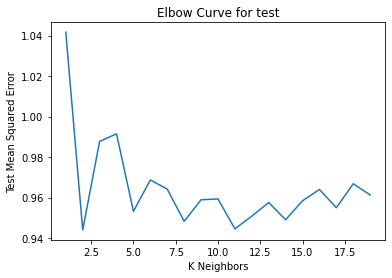

In [21]:
import matplotlib.pyplot as plt
# plotting the Curves
plt.plot(k, mse)
plt.xlabel('K Neighbors')
plt.ylabel('Test Mean Squared Error')
plt.title('Elbow Curve for test')

Text(0.5, 1.0, 'Elbow Curve for test')

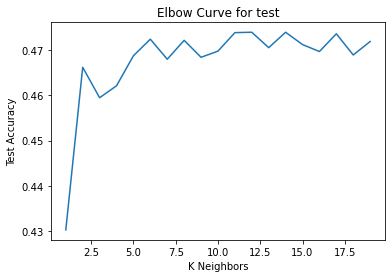

In [22]:
# plotting the Curves
plt.plot(k, acc)
plt.xlabel('K Neighbors')
plt.ylabel('Test Accuracy')
plt.title('Elbow Curve for test')

In [23]:
## Sweet Spot is around 11